In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import json
import sys
sys.path.append("../../../../")

import anamic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import tqdm

../../../../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


## Simulate a MT

In [43]:
# Set parameters for the MT simulation
mt_args = {}
mt_args['n_pf'] = 13
mt_args['mt_length_nm'] = 2000  # nm
mt_args['taper_length_nm'] = 0  # nm

# Set parameters for the image generation.
image_args = {}
image_args['labeling_ratio'] = 1  # from 0 to 1

image_args['pixel_size'] = 110  # nm/pixel
image_args['x_offset'] = 4500  # nm
image_args['y_offset'] = 4500  # nm

image_args['psf_size'] = 130  # nm
image_args['signal_mean'] = 700
image_args['signal_std'] = 100
image_args['bg_mean'] = 500
image_args['bg_std'] = 24
image_args['noise_factor'] = 1.2
    
# Generate the dimers
dimers = anamic.simulator.dimers_builder(**mt_args)

# Create the simulator object
ms = anamic.simulator.MicrotubuleSimulator(dimers)

# Update the parameters
ms.parameters.update(image_args)

# Build a single microtubule image
ms.build_all(apply_random_z_rotation=True, show_progress=False)

# Round image
ms.image = np.round(ms.image)
ms.image = ms.image.astype('uint16')

# Open the image
image = ms.image

# Load metadata
metadata = ms.parameters

# Get microtubule tip coordinates
tip_start = np.array(metadata['tip_start'])
tip_end = np.array(metadata['tip_end'])

metadata

{'date': '2019-01-17T16:17:48.067970',
 'n_pf': 13,
 'row': 250,
 '3d_z_rotation_angle': 162.5300840045695,
 'projected_rotation_angle': -234.6585820408832,
 'labeling_ratio': 1,
 'pixel_size': 110,
 'x_offset': 4500,
 'y_offset': 4500,
 'psf_size': 130,
 'sigma_pixel': 1.1818181818181819,
 'tip_start': (51.0, 55.0),
 'tip_end': (40.38461538461539, 40.53846153846154),
 'signal_mean': 700,
 'signal_std': 100,
 'bg_mean': 500,
 'bg_std': 24,
 'noise_factor': 1.2,
 'snr_line_width': 3,
 'snr': 2.8690394324563684}

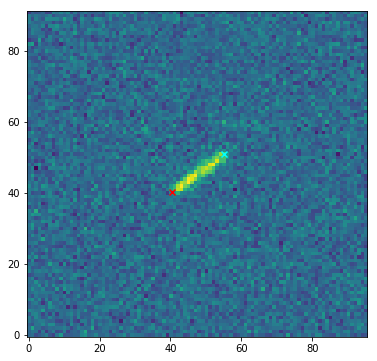

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(image, interpolation='none', origin=[0, 0], cmap='viridis')
ax.set_aspect('equal')

ax.scatter(tip_start[1], tip_start[0], color='cyan', marker="x")
ax.scatter(tip_end[1], tip_end[0], color='red', marker="x")

## Tip Fitter

In [32]:
metadata

{'date': '2019-01-17T16:16:33.661215',
 'n_pf': 13,
 'row': 250,
 '3d_z_rotation_angle': -457.0733127431628,
 'projected_rotation_angle': -474.79687879390144,
 'labeling_ratio': 1,
 'pixel_size': 110,
 'x_offset': 4500,
 'y_offset': 4500,
 'psf_size': 130,
 'sigma_pixel': 1.1818181818181819,
 'tip_start': (48.0, 40.69230769230769),
 'tip_end': (40.53846153846154, 57.0),
 'signal_mean': 700,
 'signal_std': 100,
 'bg_mean': 500,
 'bg_std': 24,
 'noise_factor': 1.2,
 'snr_line_width': 3,
 'snr': 2.7038169877483664}